# Section 3.1 — Estimators

This notebook contains the code examples from [Section 3.1 Estimators]() of the **No Bullshit Guide to Statistics**.

We'll begin our study of inferential statistics by introducing **estimators**,
which are the math tools used for both **estimation**  and **hypothesis testing**.

![simplified_estimators.png](../stats_overview/figures/simplified_estimators.png)

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from plot_helpers import plot_pdf
from plot_helpers import savefigure

In [3]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (5,2)},
)
blue, orange  = sns.color_palette()[0], sns.color_palette()[1]

DESTDIR = "figures/stats/estimators"

%config InlineBackend.figure_format = 'retina'

In [4]:
# set random seed for repeatability
np.random.seed(42)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$


(this cell contains the macro definitions $\stderr{}$, $\stderrhat{}$, $\Mean$, ...)

## Statistical inference context

DATA:
- population
- sample
- statistic

PROB:
- probability model
- model family
- parameters


Statistical inference is the use the values of the statistics obtained from the sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to estimate the population parameters $\theta$. For example,
the sample mean $\overline{\mathbf{x}}=\Mean(\mathbf{x})$ is an estimate of the population mean $\mu$,
and the sample variance $s_{\mathbf{x}}^2=\Var(\mathbf{x})$ is an estimate of the population variance $\sigma^2$.

## Estimator definitions

- We use the term "estimator" to describe a function $g$ that takes samples as inputs
  and produces parameter estimates as outputs.
  Written mathematically, and estimator is a function of the form:
  $$
   g \colon \underbrace{\mathcal{X}\times \mathcal{X}\times \cdots \times \mathcal{X}}_{n \textrm{ copies}}
   \quad \to \quad \mathbb{R},
  $$
  where $n$ is the samples size and $\mathcal{X}$ denotes the possible values of the random variable $X$.
- We give different names to estimates, depending on the use case:
  - **statistic** = a quantity computed from a sample (e.g. descriptive statistics)
  - **parameter estimates** = statistics that estimate population parameters
  - **test statistic** = an estimate used as part of hypothesis testing procedure
- The **value** of the estimator $g(\mathbf{x})$ is computed from a particular sample
  $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.
- The **sampling distribution** of the estimator $g$ is the distribution of $g(\mathbf{X})$,
  where $\mathbf{X} = (X_1, X_2, \ldots, X_n)$ is a *random sample*.

### Estimators for numerical variables

Let's start with some estimators you're already familiar with (discussed in [descriptive statistics](./13_descriptive_statistics.ipynb)):

#### Sample mean

  - estimator: $\overline{\mathbf{x}} = \Mean(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n x_i$
  - gives an estimate for the population mean $\mu$

In [5]:
def mean(sample):
    return sum(sample) / len(sample)

# ALT. use np.mean(sample)
# ALT. use .mean() method on a Pandas series

#### Sample variance

  - estimator: $s_{\mathbf{x}}^2 = \Var(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2$
  - gives an estimate for the population variance $\sigma^2$
  - note the denominator is $(n-1)$ and not $n$ 

In [6]:
def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

# ALT. use np.var(sample, ddof=1)
# ALT. use .var() method on a Pandas series

In this notebook we'll develop some new estimators that are specific for the comparison of the two groups.

#### Difference between sample means
  - estimator: $\hat{d} = \DMeans(\mathbf{x}_A, \mathbf{x}_B) = \Mean(\mathbf{x}_A) - \Mean(\mathbf{x}_B) = \overline{\mathbf{x}}_A - \overline{\mathbf{x}}_B$
  - gives an estimate for the difference between population means: $\Delta =  \mu_A - \mu_B$

In [7]:
def dmeans(xsample, ysample):
    """
    Compute the difference between group means of the samples.
    """
    dhat = np.mean(xsample) - np.mean(ysample)
    return dhat

#### Example 1: electricity prices means, variances, and difference between means


In [8]:
eprices = pd.read_csv("../datasets/eprices.csv")
# eprices

In [9]:
xW = eprices["West"]
xW.values

array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5])

In [10]:
xE = eprices["East"]
xE.values

array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5])

Next we calculate the mean of the prices in the West end:

In [11]:
mean(xW)

9.155555555555555

Let's also calculate the variance of the electricity prices in the West end:

In [12]:
var(xW)

2.440277777777778

Similarly, we can calculate the mean and the variance of the electricity prices in the East end.

In [13]:
mean(xE), var(xE)

(6.155555555555555, 0.7702777777777777)

Finally,
we compute the estimate $\hat{d} = \textrm{DMeans}(\tt{xW}, \tt{xE})$.

In [14]:
dmeans(xW, xE)

3.000000000000001

## Sampling distributions


TODO import definitions


### Examples of sampling distributions

Let's look at the same estimators that we described in the previous section,
but this time applied to *random* samples of size $n$:

- Sample mean: $\overline{\mathbf{X}} = \Mean(\mathbf{X}) = \tfrac{1}{n}\sum_{i=1}^n X_i$
- Sample variance: $S_{\mathbf{X}}^2 = \Var(\mathbf{X}) = \tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2$
- Difference between sample means: $\hat{D} = \DMeans(\mathbf{X}, \mathbf{Y}) = \overline{\mathbf{X}} - \overline{\mathbf{Y}}$ 

Note these formulas is identical to the formulas we saw earlier.
The only difference is that we're calculating the functions $g$, $h$, and $d$ based on a random sample $\mathbf{X} = (X_1, X_2, \ldots, X_n)$,
instead of particular sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.

### Estimator properties

- **bias**
- **variance**
  The square root of the variance of an estimator is called the **standard error**.


![bias and variance](attachments/stats/estimators/bias_and_variance_targets.png)

### Visualizing sampling distributions



In [23]:
def gen_sampling_dist(rv, statfunc, n, N=10000):
    stats = []
    for i in range(0, N):
        sample = rv.rvs(n)
        stat = statfunc(sample)
        stats.append(stat)
    return stats

#### Example 3: normally distributed population with known parameters

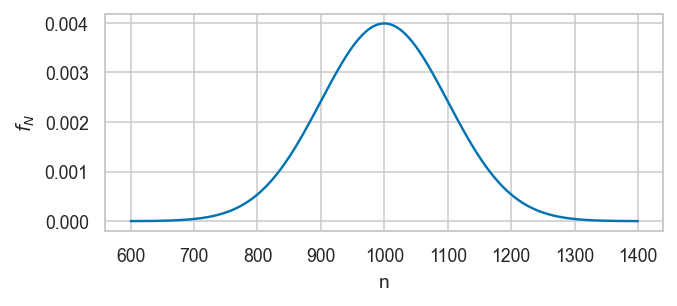

In [24]:
from scipy.stats import norm
mu = 1000
sigma = 100
rvN = norm(mu, sigma)

ax = plot_pdf(rvN, xlims=[600,1400], rv_name="N")

In [25]:
filename = os.path.join(DESTDIR, "plot_pdf_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/plot_pdf_normal_mu1000_sigma100.pdf
Saved figure to figures/stats/estimators/plot_pdf_normal_mu1000_sigma100.png


##### Sampling distribution of sample mean

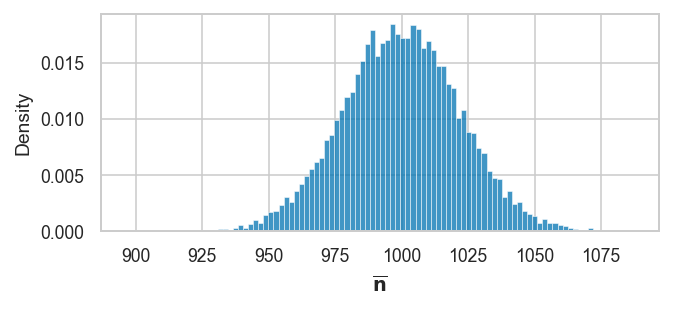

In [26]:
np.random.seed(43)
nbars = gen_sampling_dist(rvN, statfunc=mean, n=20)
ax = sns.histplot(nbars, stat="density", bins=100)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

In [27]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_n20_normal_mu1000_sigma100.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_n20_normal_mu1000_sigma100.png


In [28]:
# expected  observed
mu,         np.mean(nbars)

(1000, 999.7597183686964)

In [29]:
# expected     observed
sigma**2/20,   np.var(nbars, ddof=1)

(500.0, 487.6015916377254)

##### Sampling distribution of sample variance

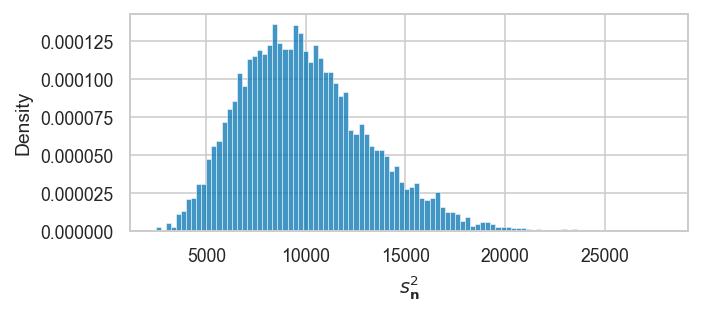

In [30]:
np.random.seed(44)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density", bins=100)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

In [31]:
filename = os.path.join(DESTDIR, "sampling_dist_var_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_var_n20_normal_mu1000_sigma100.pdf
Saved figure to figures/stats/estimators/sampling_dist_var_n20_normal_mu1000_sigma100.png


In [32]:
# expected   observed
sigma**2,    np.mean(nvars)

(10000, 9939.922540353122)

##### Sampling distribution of sample median (optional)

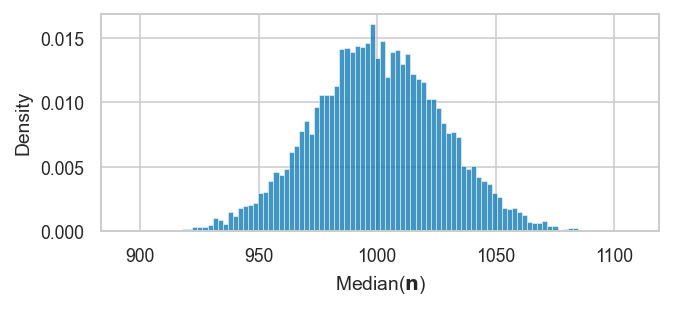

In [33]:
np.random.seed(44)
nmedians = gen_sampling_dist(rvN, statfunc=np.median, n=20)
ax = sns.histplot(nmedians, stat="density", bins=100)
_ = ax.set_xlabel("Median(${\mathbf{n}}$)")

##### Sampling distribution of 90th percentile (optional)

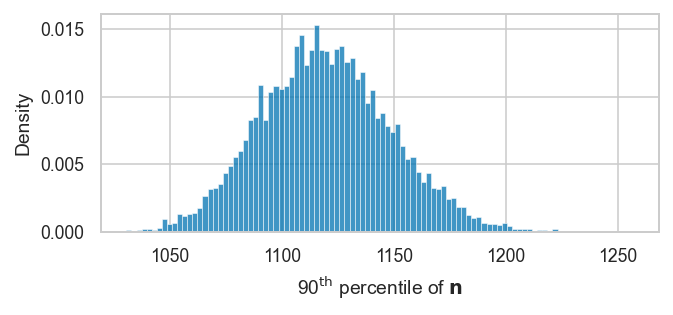

In [34]:
def ninetypctile(sample):
    return np.percentile(sample, 90)
    
ninetypctiles = gen_sampling_dist(rvN, statfunc=ninetypctile, n=30)
ax = sns.histplot(ninetypctiles, stat="density", bins=100)
_ = ax.set_xlabel("90$^\mathrm{th}$ percentile of ${\mathbf{n}}$")

##### Ground truth for estimates

Let's generate a particular sample to use in examples.

In [35]:
np.random.seed(47)
nsample20 = rvN.rvs(20)
nsample20

array([ 915.19905242, 1130.59063579, 1092.42079662, 1064.04118012,
        894.52630171, 1179.77607151,  898.72132495, 1082.36233243,
        970.53496466,  940.75294285,  860.62729413, 1110.41796717,
        906.76597141,  905.68435632, 1043.66062317, 1079.495827  ,
       1071.95331527, 1008.76622566,  867.72515937, 1005.17939788])

In [36]:
# [round(n,2) for n in nsample20]

In [37]:
mean(nsample20)

1001.460087023688

In [38]:
var(nsample20)

9574.586463484658

##### Ground truth for sampling distributions

The sampling distribution graphs we saw above represent the true sampling distributions
for the estimators $\Mean$, $\Var$, etc.,
generated from samples of size $n=20$ from the population
$N \sim \mathcal{N}(\mu_N=1000, \sigma_N=100)$.

We can therefore use them as the "ground truth" for the approximations techniques
we'll learn about in the next two subsections.

## Analytical approximation formulas

Use probability theory formulas to come up with approximation formulas for certain sampling distributions.


### Statistical assumptions

- LARGEn:
- NORMAL:
- EQVAR:




### Sample mean estimator

- CLT

#### Verification of the CLT

The true sampling distribution of the sample mean generated using simulation
from thousands of samples of size $n=20$.

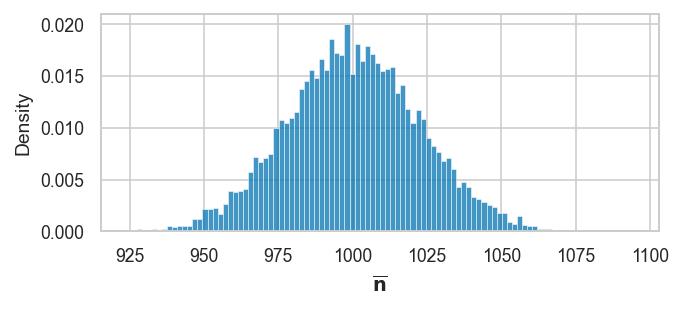

In [39]:
n = 20
nbars = gen_sampling_dist(rvN, statfunc=mean, n=n)
ax = sns.histplot(nbars, stat="density", bins=100)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

Let's now superimpose a lineplot of the analytical approximation formula
we obtain from the central limit theorem.

In [40]:
n = 20
meanNbar = rvN.mean()
seNbar = rvN.std() / np.sqrt(n)
meanNbar, seNbar, 100/np.sqrt(20)

(1000.0, 22.360679774997894, 22.360679774997894)

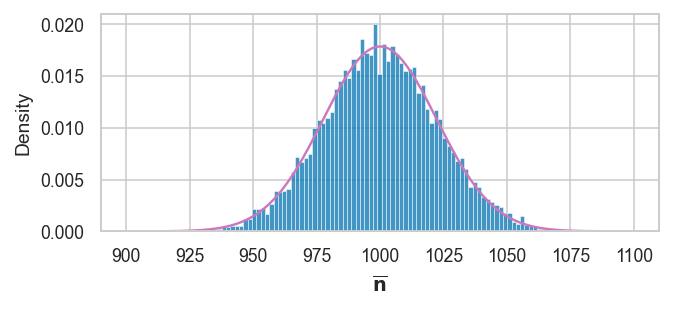

In [41]:
rvNbar = norm(meanNbar, seNbar)
xs = np.linspace(900, 1100, 1000)
sns.lineplot(x=xs, y=rvNbar.pdf(xs), ax=ax, color="m")
ax.figure

In [42]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_exp_and_theory_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_exp_and_theory_n20_normal_mu1000_sigma100.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_exp_and_theory_n20_normal_mu1000_sigma100.png


In [43]:
np.random.seed(51)
nsample7 = rvN.rvs(7)
nsample7

array([ 970.94968267, 1011.21280471, 1125.07951228,  863.91100289,
       1009.99328823,  995.20088969,  964.37703097])

In [44]:
nvar = var(nsample7)
nstd = np.sqrt(nvar)
nstd

77.48623002231908

In [45]:
# the true population standard deviation
sigma

100

#### The sample mean for small samples

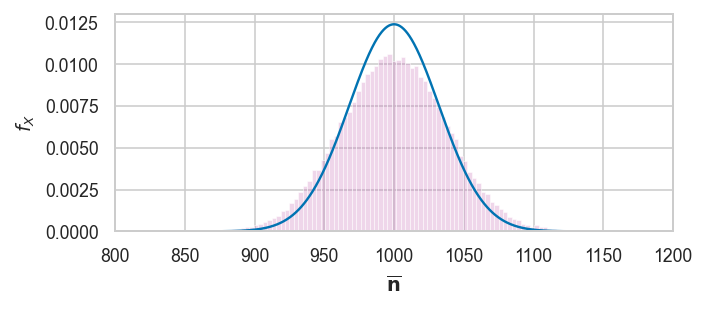

In [46]:
np.random.seed(48)
# np.random.seed(54)
n = 7

from scipy.stats import norm
mu = 1000
sigma = 100
rvN = norm(mu, sigma)

fig, ax = plt.subplots()

# true sampling distirbution of the mean
nbars7 = gen_sampling_dist(rvN, statfunc=mean, n=n, N=50000)
sns.histplot(nbars7, stat="density", bins=100, ax=ax, alpha=0.3, color="m")
ax.set_xlim([800,1200])

np.random.seed(52)
# generate a particular sample
nsample = rvN.rvs(n)
xbar = mean(nsample)
xstd = np.std(nsample, ddof=1)
sehat = xstd / np.sqrt(n)
# print(xbar, xstd, sehat)

# Normal distribution (known mean)
from scipy.stats import norm
rvY = norm(mu, sehat)
plot_pdf(rvY, ax=ax)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")
# ax.figure

In [47]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_N_approx_from_nsample7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_N_approx_from_nsample7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_N_approx_from_nsample7.png


#### A better reference distribution

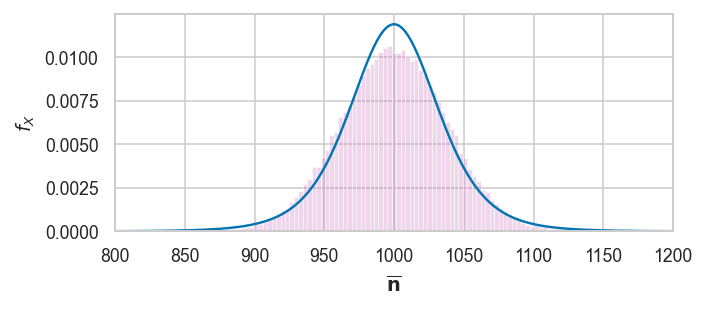

In [48]:
fig, ax = plt.subplots()

# true sampling distirbution of the mean
sns.histplot(nbars7, stat="density", bins=100, ax=ax, alpha=0.3, color="m")
ax.set_xlim([800,1200])

# Student's t-distribution (known mean)
from scipy.stats import t as tdist
df = n - 1
rvT = tdist(df, loc=mu, scale=sehat)
plot_pdf(rvT, ax=ax)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

In [49]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_T_approx_from_nsample7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_T_approx_from_nsample7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_T_approx_from_nsample7.png


### Sample variance estimator


Chi-square

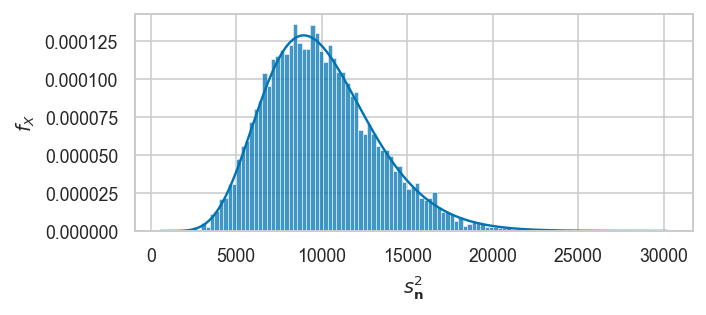

In [50]:
# nsample20 = rvN.rvs(20)
# nsample20
# xbar = mean(nsample20)
# xstd = np.sqrt( np.var(nsample20, ddof=1) )
# print(xbar, xstd)

np.random.seed(44)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density", bins=100)

from scipy.stats import chi2
X2 = chi2(20-1, loc=0, scale=sigma**2/(20-1))
plot_pdf(X2, ax=ax)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

### Difference between means estimator


Consider two normally distributed random variables $X_A$ and $X_B$:
$$ 
X_A \sim \mathcal{N}\!\left(\mu_A, \sigma_A \right)
\qquad
\textrm{and}
\qquad
X_B \sim \mathcal{N}\!\left(\mu_B, \sigma_B \right)
$$
that describe the probability distribution for groups A and B, respectively.

- A sample of size $n_A$ from $X_A$ is denoted $\mathbf{x}_A = (x_1, x_2, \ldots, x_{n_A})$=`xA`,
  and let $\mathbf{x}_B = (x_1, x_2, \ldots, x_{n_B})$=`xB` be a random sample of size $n_B$ from $X_B$.
- We compute the mean in each group: $\overline{\mathbf{x}}_{A} = \texttt{mean}(\mathbf{x}_A)$
  and $\overline{\mathbf{x}}_{B} = \texttt{mean}(\mathbf{x}_B)$
- The value of the estimator is $\hat{d} = \overline{\mathbf{x}}_{A} - \overline{\mathbf{x}}_{B}$

Note the difference between group means is precisely the estimator Amy need for her analysis (**Group S** and **Group NS**). We intentionally use the labels **A** and **B** to illustrate the general case.

#### Sampling distribution of the estimator `dmeans`

How well does the estimate $\hat{d}$ approximate the true value $\Delta$?
**What is the accuracy and variability of the estimates we can expect?**

To answer these questions, consider the random samples
$\mathbf{X}_A = (X_1, X_2, \ldots, X_{n_A})$
and $\mathbf{X}_B = (X_1, X_2, \ldots, X_{n_B})$,
then compute the **sampling distribution**: $\hat{D} = \overline{\mathbf{X}}_A - \overline{\mathbf{X}}_{B}$.

By definition, the sampling distribution of the estimator is obtained by repeatedly generating samples `xA` and `xB` from the two distributions and computing `dmeans` on the random samples. For example, we can obtain the sampling distribution by generating $N=1000$ samples.

#### Theoretical model for the sampling distribution of `dmeans`

Let's now use probability theory to build a theoretical model for the sampling distribution of the difference-between-means estimator `dmeans`.

- The central limit theorem tells us the sample mean within the two group are
  $$
  \overline{\mathbf{X}}_A \sim \mathcal{N}\!\left(\mu_A, \tfrac{\sigma_A}{\sqrt{n_A}} \right)
  \qquad \textrm{and} \qquad
  \overline{\mathbf{X}}_B \sim \mathcal{N}\!\left(\mu_B, \tfrac{\sigma_B}{\sqrt{n_B}} \right).
  $$

- The rules of probability theory tells us that the [difference of two normal random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables) requires subtracting their means and adding their variance, so we get:
  $$
  D \sim \mathcal{N}\!\left(\mu_A - \mu_B, \  \sqrt{\tfrac{\sigma^2_A}{n_A} + \tfrac{\sigma^2_B}{n_B}} \right).
  $$

In other words, the sampling distribution for the difference between means estimator $\hat{D}$ has mean and standard deviation given by:
$$ 
   \mu_D = \mu_A - \mu_B
   \qquad \textrm{and} \qquad
   \sigma_D = \sqrt{ \tfrac{\sigma^2_A}{n_A} + \tfrac{\sigma^2_B}{n_B}  }.
$$

Probability theory predicts the sampling distribution had mean ...

In [51]:
# Dmean = muA - muB
# Dmean

... and standard deviation:

In [52]:
# Dstd = np.sqrt(sigmaA**2/nA + sigmaB**2/nB)
# Dstd

Let's plot the theoretical sampling distribution 
on top of the simulated data to see if they are a good fit.

In [53]:
# x = np.linspace(min(dmeans_sdist), max(dmeans_sdist), 10000)
# D = norm(Dmean, Dstd).pdf(x)
# label = 'Theoretical sampling distribuition'
# sns.lineplot(x=x, y=D, ax=ax3, label=label, color=blue)
# ax3.figure

## Bootstrap estimation

In [62]:
from statistics import mean

def bootstrap_stat(sample, statfunc=mean, B=5000):
    """
    Compute the sampling dist. of the `statfunc` estimator
    from `B` bootstrap samples generated from `sample`.
    """
    n = len(sample)
    bstats = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bstat = statfunc(bsample)
        bstats.append(bstat)
    return bstats

#### Example 3 (continued): normal distribution

In [63]:
np.random.seed(47)
nsample20 = rvN.rvs(20)
nsample20

array([ 915.19905242, 1130.59063579, 1092.42079662, 1064.04118012,
        894.52630171, 1179.77607151,  898.72132495, 1082.36233243,
        970.53496466,  940.75294285,  860.62729413, 1110.41796717,
        906.76597141,  905.68435632, 1043.66062317, 1079.495827  ,
       1071.95331527, 1008.76622566,  867.72515937, 1005.17939788])

In [64]:
nsample20.mean()

1001.460087023688

#### Bootstrapped sampling distribution of the sample mean

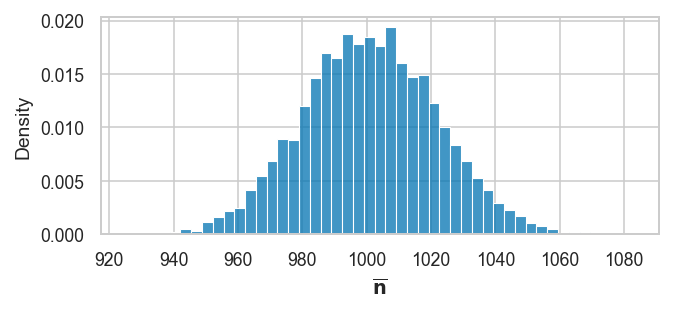

In [65]:
np.random.seed(48)
nbars_boot = bootstrap_stat(nsample20, statfunc=mean)
ax = sns.histplot(nbars_boot, stat="density")
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

In [66]:
filename = os.path.join(DESTDIR, "bootstrap_dist_mean_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_mean_n20_normal_mu1000_sigma100.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_mean_n20_normal_mu1000_sigma100.png


In [67]:
np.mean(nbars_boot), np.std(nbars_boot, ddof=1)

(1001.0014581308317, 20.936054616679304)

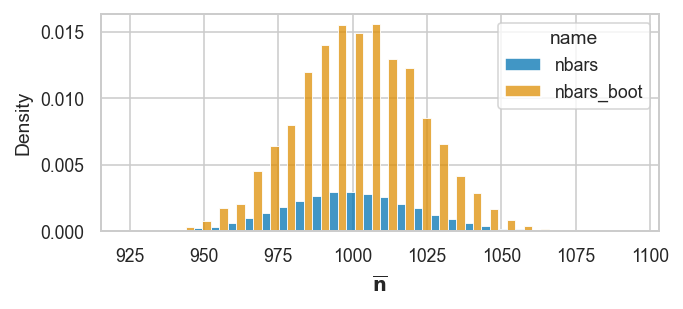

In [68]:
# combined histogram
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': nbars, 'name': 'nbars'}),
    pd.DataFrame.from_dict({'value': 10*nbars_boot, 'name': 'nbars_boot'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=30, stat="density", x='value', hue='name', multiple='dodge',ax=ax)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

#### Bootstrapped sampling distribution of the sample variance

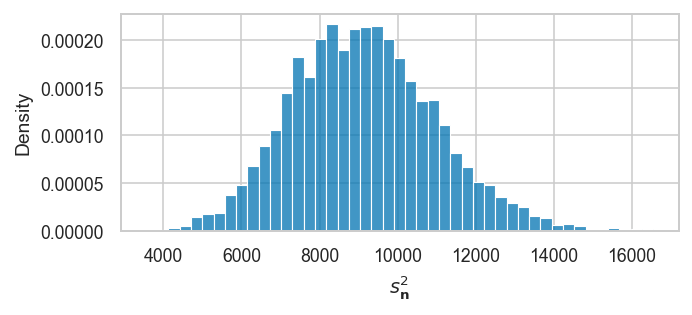

In [69]:
np.random.seed(48)
nvars_boot = bootstrap_stat(nsample20, statfunc=var)
ax = sns.histplot(nvars_boot, stat="density")
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

In [70]:
filename = os.path.join(DESTDIR, "bootstrap_dist_var_n20_normal_mu1000_sigma100.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_var_n20_normal_mu1000_sigma100.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_var_n20_normal_mu1000_sigma100.png


In [71]:
np.mean(nvars_boot), np.std(nvars_boot, ddof=1)

(9126.301558576393, 1846.198278359838)

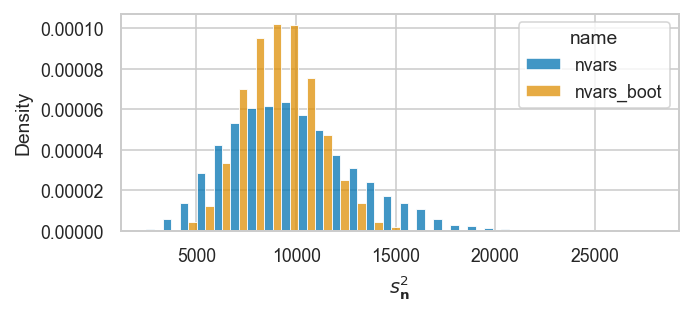

In [72]:
# combined histogram
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': nvars, 'name': 'nvars'}),
    pd.DataFrame.from_dict({'value': 2*nvars_boot, 'name': 'nvars_boot'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=30, stat="density", x='value',
             hue='name', multiple='dodge',ax=ax)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

#### Bootstrapped sampling distribution of the sample median (optional)

<AxesSubplot:ylabel='Count'>

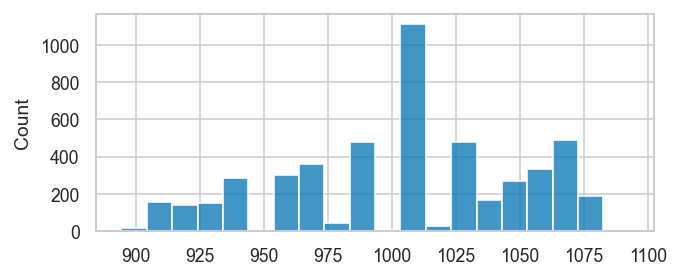

In [73]:
np.random.seed(49)
nmedians_boot = bootstrap_stat(nsample20, statfunc=np.median)
sns.histplot(nmedians_boot, bins=20)

In [74]:
np.mean(nmedians_boot), np.std(nmedians_boot, ddof=1)

(1004.0017395509528, 46.06950809877877)

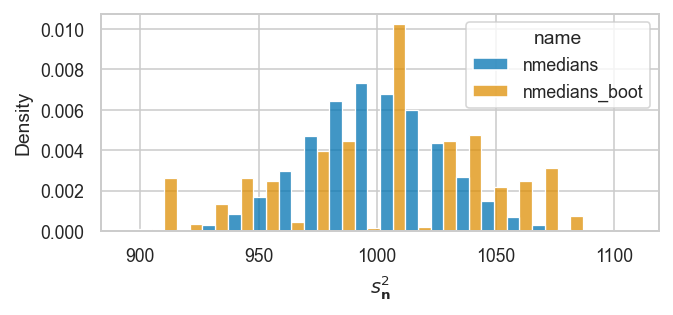

In [100]:
# combined histogram
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': nmedians, 'name': 'nmedians'}),
    pd.DataFrame.from_dict({'value': 2*nmedians_boot, 'name': 'nmedians_boot'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=20, stat="density", x='value',
             hue='name', multiple='dodge',ax=ax)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

#### Bootstrapped sampling distribution of the difference between means

<AxesSubplot:ylabel='Density'>

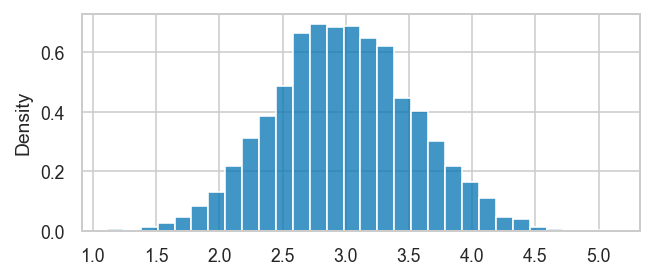

In [105]:
eprices = pd.read_csv("../datasets/eprices.csv")
xW = eprices["West"]
xE = eprices["East"]

# compute bootstrap estimates for mean in each group
meanW_bstats = bootstrap_stat(xW, statfunc=np.mean)
meanE_bstats = bootstrap_stat(xE, statfunc=np.mean)

# compute the difference between means from bootstrap samples
dmeans_bstats = []
for bmeanW, bmeanE in zip(meanW_bstats, meanE_bstats):
    d_boot = bmeanW - bmeanE
    dmeans_bstats.append(d_boot)

sns.histplot(dmeans_bstats, stat="density", bins=30)

## Estimator applications

- Parameter estimates
- Effect size estimates
- Confidence intervals
- Test statistics

TODO: import one-liner explanation for each of these


## Confidence intervals

$$
 CI = \left[
         F^{-1}\big(\tfrac{\alpha}{2}\big),
         F^{-1}\big(1-\tfrac{\alpha}{2}\big)
      \right]
$$

### Analytical approximations

#### Confidence interval for the sample mean

In [77]:
n = 20
xbar = mean(nsample20)
xstd = np.std(nsample20, ddof=1)
sehat = xstd / np.sqrt(n)

from scipy.stats import t as tdist
rvT = tdist(n-1)

t_05 = abs(rvT.ppf(0.05))
t_95 = abs(rvT.ppf(0.95))
CI_mu_tdist = [xbar - t_05*sehat, xbar + t_95*sehat]
CI_mu_tdist

[963.6268617138455, 1039.2933123335304]

#### Confidence interval for the sample variance

In [78]:
n = 20
xvar = np.var(nsample20, ddof=1)

from scipy.stats import chi2
rvX2 = chi2(n-1)

x2_05 = rvX2.ppf(0.05)
x2_95 = rvX2.ppf(0.95)
CI_sigma2_tdist = [(n-1)*xvar/x2_95, (n-1)*xvar/x2_05]
CI_sigma2_tdist

[6035.031718920199, 17981.3094693008]

### Bootstrap confidence intervals

#### Confidence interval for the sample mean

In [79]:
np.random.seed(48)
nbars_boot = bootstrap_stat(nsample20, statfunc=mean)
CI_mu_boot = [np.percentile(nbars_boot,5),
              np.percentile(nbars_boot,95)]
CI_mu_boot

[966.9101312640927, 1035.6221138821832]

In [80]:
# true
[np.percentile(nbars,5),
 np.percentile(nbars,95)]

[963.6913925936195, 1037.764466936426]

#### Confidence interval for the sample variance

In [81]:
np.random.seed(48)
nvars_boot = bootstrap_stat(nsample20, statfunc=var)
CI_sigma2_boot = [np.percentile(nvars_boot,5),
                 np.percentile(nvars_boot,95)]
CI_sigma2_boot

[6266.96068176931, 12339.257249958699]

In [82]:
# true
[np.percentile(nvars,5),
 np.percentile(nvars,95)]

[5310.333761562281, 15828.681531295735]

#### Confidence interval for the sample median (optional)

In [83]:
nmedians_boot = bootstrap_stat(nsample20, statfunc=np.median)
CI_median_boot = [np.percentile(nmedians_boot,5),
                  np.percentile(nmedians_boot,95)]
CI_median_boot

[915.199052423386, 1071.7685035634472]

In [84]:
# true
[np.percentile(nmedians,5),
 np.percentile(nmedians,95)]

[955.463349365222, 1045.3475276397405]

#### Confidence interval for the 90th percentile (optional)

In [85]:
ninetypctiles_boot = bootstrap_stat(nsample20, statfunc=ninetypctile)
CI_ninetypctile_boot = [np.percentile(ninetypctiles_boot,5),
                        np.percentile(ninetypctiles_boot,95)]
CI_ninetypctile_boot

[1079.7824775466474, 1179.7760715125444]

In [86]:
# true
[np.percentile(ninetypctiles,5),
 np.percentile(ninetypctiles,95)]

[1073.100079722891, 1169.462270540716]

## Explanations

### Unbiased estimator of the sample variance

10029.611947721529

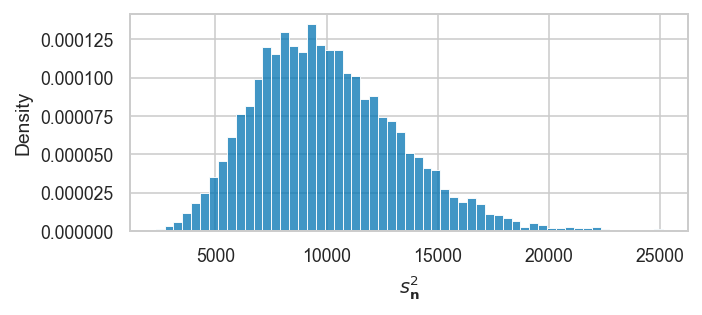

In [87]:
np.random.seed(16)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density")
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")
np.mean(nvars)

#### Biased estimator of the sample variance

In [88]:
def s2tilde(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / len(sample)

In [89]:
# known population model
from scipy.stats import norm
mu = 1000
sigma = 100
rvN = norm(mu, sigma)

9528.131350335454

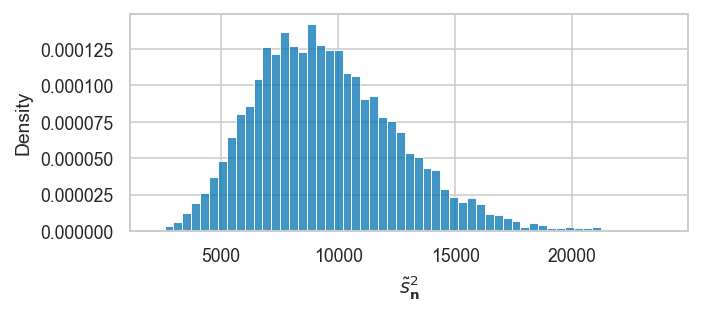

In [90]:
np.random.seed(16)
n = 20
s2tildes = gen_sampling_dist(rvN, statfunc=s2tilde, n=n)
ax = sns.histplot(s2tildes, stat="density")
_ = ax.set_xlabel("$\\tilde{s}^2_{\mathbf{n}}$")
np.mean(s2tildes)

In [91]:
np.mean(np.array(s2tildes)*n/(n-1))

10029.611947721529

## Discussion

### Discovering estimator formulas

#### Method of moments

In [92]:
from scipy.stats import norm

norm.fit(nsample20, method="MM")

(1001.460087023688, 95.37220318473526)

In [93]:
from scipy.stats import expon

lam = 0.2
esample20 = expon(0, 1/lam).rvs(20)

expon.fit(esample20, floc=0, method="MM")

(0, 6.022549491872384)

#### Maximum likelihood estimation

In [94]:
norm.fit(nsample20, method="MLE")

(1001.460087023688, 95.37220318473526)

In [95]:
expon.fit(esample20, floc=0, method="MLE")

(0.0, 6.0225667286941285)

#### Bayesian estimators

# CUT MATERIAL

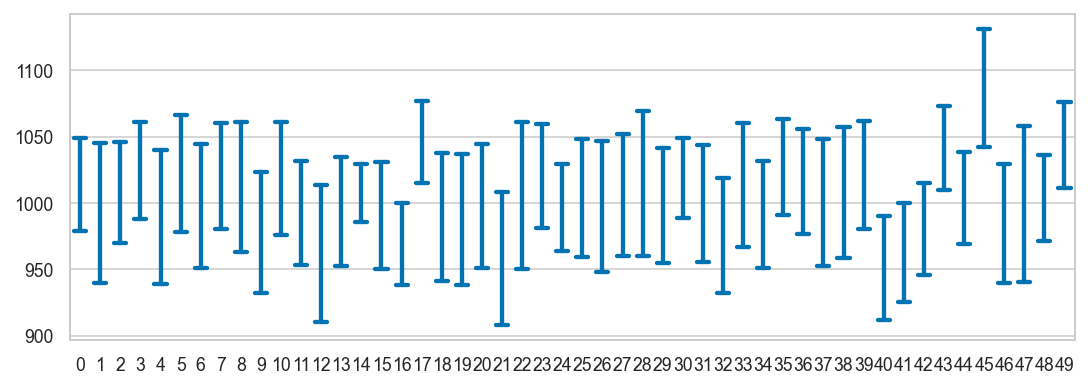

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

N = 50
n = 20

# Generate 30 samples from a normal dist. N(1000,100)
samples = np.random.normal(1000, 100, size=(N, n))

# Compute the mean and standard error of the mean for each sample
means = np.mean(samples, axis=1)
sem = np.std(samples, axis=1) / np.sqrt(samples.shape[1])

# Compute the confidence intervals for the mean
confidence_intervals = [means - 1.96 * sem, means + 1.96 * sem]

# # Plot the confidence intervals using seaborn
# sns.lineplot(x=np.arange(N), y=confidence_intervals[0])
# sns.lineplot(x=np.arange(N), y=confidence_intervals[1])

import warnings

with warnings.catch_warnings(), plt.rc_context({"figure.figsize":(9,3)}):
    warnings.filterwarnings('ignore', category=UserWarning)    
    ax = sns.pointplot(samples.T, errorbar=('ci', 95), 
                       join=False, capsize=0.6, markers=" ", color="b")

In [97]:
len(ax.artists)

0